# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
enough_cities = "no"

while enough_cities == "no":

    # Create a set of random lat and lng combinations
    lats = np.random.uniform(low=-90.000, high=90.000, size=550)
    lngs = np.random.uniform(low=-180.000, high=180.000, size=550)
    lat_lngs = zip(lats, lngs)

    # Identify nearest city for each lat, lng combination
    for lat_lng in lat_lngs:
        city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
        # If the city is unique, then add it to a our cities list
        if city not in cities:
            cities.append(city)

    # Print the city count to confirm sufficient count
    print(len(cities))
    
    if len(cities) >= 500:
        enough_cities = "yes"
        

277
463
621


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Documentation on units: https://openweathermap.org/weather-data

# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Build container variables for storing weather data
city_name = []
city_cloudiness = []
city_country = []
city_date = []
city_humidity = []
city_lat = []
city_lng = []
city_max_temp = []
city_wind_speed = []

# Store loop counting variables
city_count = 1
set_count = 1

In [4]:
# Use a loop to search for data on every city
for x in cities:
    
    # Create variables for storing the data
    response = requests.get(query_url + x)
    response_json = response.json()
    
    # Log current record attempt
    print(f"Processing Record {city_count} of Set {set_count} | {x}")
    
    # Log data in "sets" of 50
    if city_count % 50 == 0:
        city_count = 1
        set_count += 1
    else:
        city_count +=1
    
    # Anticipate data collection errors and build multiple series of data points if successful
    try:
        city_cloudiness.append(response_json['clouds']['all'])
        city_country.append(response_json['sys']['country'])
        city_date.append(response_json['dt'])
        city_humidity.append(response_json['main']['humidity'])
        city_lat.append(response_json['coord']['lat'])
        city_lng.append(response_json['coord']['lon'])
        city_max_temp.append(response_json['main']['temp_max'])
        city_wind_speed.append(response_json['wind']['speed'])
        
        # Even though we alraedy have the city names as "cities", we only want to use the ones with data
        city_name.append(x)
        
    except:
        
        # Makes a note if data was not found in OpenWeather for a particular city
        print("City not found. Skipping...")
        pass

Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | lompoc
Processing Record 3 of Set 1 | bambous virieux
Processing Record 4 of Set 1 | kavieng
Processing Record 5 of Set 1 | atuona
Processing Record 6 of Set 1 | port elizabeth
Processing Record 7 of Set 1 | hobart
Processing Record 8 of Set 1 | los llanos de aridane
Processing Record 9 of Set 1 | busselton
Processing Record 10 of Set 1 | eureka
Processing Record 11 of Set 1 | qaanaaq
Processing Record 12 of Set 1 | kemin
Processing Record 13 of Set 1 | chuncheng
Processing Record 14 of Set 1 | san patricio
Processing Record 15 of Set 1 | ilulissat
Processing Record 16 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 17 of Set 1 | silver city
Processing Record 18 of Set 1 | biak
Processing Record 19 of Set 1 | talnakh
Processing Record 20 of Set 1 | charters towers
Processing Record 21 of Set 1 | anda
Processing Record 22 of Set 1 | kapaa
Processing Record 23 of Set 1 | faanui
Processing Record 24 o

Processing Record 36 of Set 4 | mount gambier
Processing Record 37 of Set 4 | ostrovnoy
Processing Record 38 of Set 4 | tartus
Processing Record 39 of Set 4 | arlit
Processing Record 40 of Set 4 | lavrentiya
Processing Record 41 of Set 4 | port lincoln
Processing Record 42 of Set 4 | acapulco
Processing Record 43 of Set 4 | riyadh
Processing Record 44 of Set 4 | obo
Processing Record 45 of Set 4 | kyra
Processing Record 46 of Set 4 | vao
Processing Record 47 of Set 4 | mehran
Processing Record 48 of Set 4 | katsuura
Processing Record 49 of Set 4 | galveston
Processing Record 50 of Set 4 | adre
Processing Record 1 of Set 5 | mys shmidta
City not found. Skipping...
Processing Record 2 of Set 5 | roma
Processing Record 3 of Set 5 | richards bay
Processing Record 4 of Set 5 | coolum beach
Processing Record 5 of Set 5 | coquimbo
Processing Record 6 of Set 5 | san jose
Processing Record 7 of Set 5 | pisco
Processing Record 8 of Set 5 | jizan
Processing Record 9 of Set 5 | honiara
Processing 

Processing Record 26 of Set 8 | aklavik
Processing Record 27 of Set 8 | pirogovskiy
Processing Record 28 of Set 8 | san quintin
Processing Record 29 of Set 8 | borba
Processing Record 30 of Set 8 | bellevue
Processing Record 31 of Set 8 | makasar
Processing Record 32 of Set 8 | abong mbang
Processing Record 33 of Set 8 | turkistan
Processing Record 34 of Set 8 | alofi
Processing Record 35 of Set 8 | karamea
City not found. Skipping...
Processing Record 36 of Set 8 | cairns
Processing Record 37 of Set 8 | kihei
Processing Record 38 of Set 8 | ko samui
Processing Record 39 of Set 8 | zhigansk
Processing Record 40 of Set 8 | altay
Processing Record 41 of Set 8 | grahamstown
Processing Record 42 of Set 8 | yaan
Processing Record 43 of Set 8 | morgan city
Processing Record 44 of Set 8 | kipushi
Processing Record 45 of Set 8 | saint george
Processing Record 46 of Set 8 | beyneu
Processing Record 47 of Set 8 | upernavik
Processing Record 48 of Set 8 | paducah
Processing Record 49 of Set 8 | m

Processing Record 18 of Set 12 | souillac
Processing Record 19 of Set 12 | shebalino
Processing Record 20 of Set 12 | pontalina
Processing Record 21 of Set 12 | businga
Processing Record 22 of Set 12 | dakar
Processing Record 23 of Set 12 | itoman
Processing Record 24 of Set 12 | belaya gora
Processing Record 25 of Set 12 | murgab
Processing Record 26 of Set 12 | coahuayana
Processing Record 27 of Set 12 | amderma
City not found. Skipping...
Processing Record 28 of Set 12 | fairbanks
Processing Record 29 of Set 12 | tokur
Processing Record 30 of Set 12 | santiago del estero
Processing Record 31 of Set 12 | ternate
Processing Record 32 of Set 12 | kailua
Processing Record 33 of Set 12 | saint anthony
Processing Record 34 of Set 12 | guaduas
Processing Record 35 of Set 12 | domna
Processing Record 36 of Set 12 | campana
Processing Record 37 of Set 12 | natal
Processing Record 38 of Set 12 | la ronge
Processing Record 39 of Set 12 | baherden
Processing Record 40 of Set 12 | ninghai
Proces

In [6]:
# Create a dictionary to store the collected weather data
weather_dict = {
    "City": city_name,
    "Cloudiness": city_cloudiness,
    "Country": city_country,
    "Date": city_date,
    "Humidity": city_humidity,
    "Lat": city_lat,
    "Lng": city_lng,
    "Max Temp": city_max_temp,
    "Wind Speed": city_wind_speed
}

# Store the weather data in a DataFrame
weather_data = pd.DataFrame(weather_dict)


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
# Export to csv
weather_data.to_csv("Output/weather_data.csv")

In [8]:
# Print the DataFrame header
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,rikitea,32,PF,1585780008,72,-23.12,-134.97,78.80,5.68
1,lompoc,0,US,1585780008,59,34.64,-120.46,69.01,17.22
2,bambous virieux,40,MU,1585780009,94,-20.34,57.76,77.00,6.31
3,kavieng,90,PG,1585780009,78,-2.57,150.80,82.65,8.61
4,atuona,49,PF,1585780009,75,-9.80,-139.03,82.49,9.24


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [9]:
# Get current time to print in plot titles
time_label = time.strftime("%Y-%m-%d")

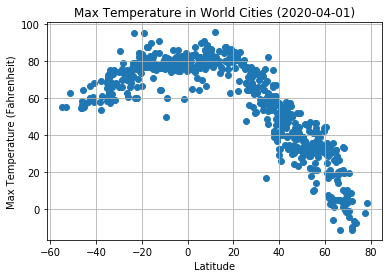

In [10]:
# Build a scatter plot for each data type
plt.scatter(city_lat, city_max_temp, marker="o")

# Incorporate the other graph properties
plt.title("Max Temperature in World Cities (" + time_label + ")")
plt.ylabel("Max Temperature (Fahrenheit)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output/TemperatureInWorldCities.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

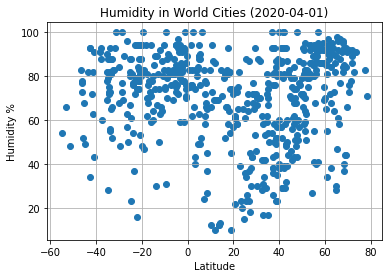

In [11]:
# Build a scatter plot for each data type
plt.scatter(city_lat, city_humidity, marker="o")

# Incorporate the other graph properties
plt.title("Humidity in World Cities (" + time_label + ")")
plt.ylabel("Humidity %")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output/HumidityInWorldCities.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

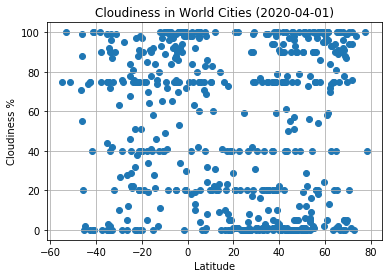

In [12]:
# Build a scatter plot for each data type
plt.scatter(city_lat, city_cloudiness, marker="o")

# Incorporate the other graph properties
plt.title("Cloudiness in World Cities (" + time_label + ")")
plt.ylabel("Cloudiness %")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output/CloudinessInWorldCities.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

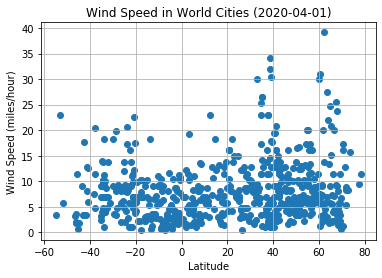

In [13]:
# Build a scatter plot for each data type
plt.scatter(city_lat, city_wind_speed, marker="o")

# Incorporate the other graph properties
plt.title("Wind Speed in World Cities (" + time_label + ")")
plt.ylabel("Wind Speed (miles/hour)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output/WindSpeedInWorldCities.png")

# Show plot
plt.show()

## Linear Regression

In [14]:
# OPTIONAL: Create a function to create Linear Regression plots
def lingressplot(x_values,y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    plt.plot(x_values,regress_values,"r-")
    print(f"The r-squared is: {rvalue**2}")
    print(f"The formula for the regression line is: {line_eq}.")

In [15]:
# Create Northern and Southern Hemisphere DataFrames
northern_df = weather_data[(weather_data.Lat >= 0)]
southern_df = weather_data[(weather_data.Lat < 0)]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.8321256562257128
The formula for the regression line is: y = -1.16x +95.02.


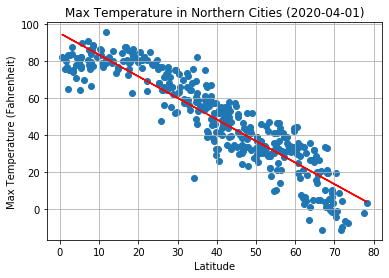

In [16]:
# Build a scatter plot for each data type
plt.scatter(northern_df.Lat, northern_df["Max Temp"], marker="o")

# Run the regression plotting function
lingressplot(northern_df.Lat,northern_df["Max Temp"])

# Incorporate the other graph properties
plt.title("Max Temperature in Northern Cities (" + time_label + ")")
plt.ylabel("Max Temperature (Fahrenheit)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output/TemperatureInNorthernCities.png")

# Show plot
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.45577695648455796
The formula for the regression line is: y = 0.45x +82.56.


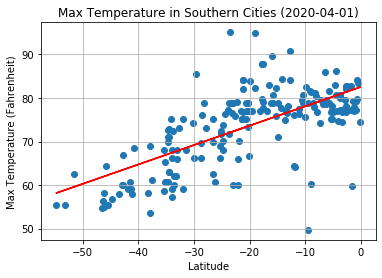

In [17]:
# Build a scatter plot for each data type
plt.scatter(southern_df.Lat, southern_df["Max Temp"], marker="o")

# Run the regression plotting function
lingressplot(southern_df.Lat,southern_df["Max Temp"])

# Incorporate the other graph properties
plt.title("Max Temperature in Southern Cities (" + time_label + ")")
plt.ylabel("Max Temperature (Fahrenheit)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output/TemperatureInSouthernCities.png")

# Show plot
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.06417691729455087
The formula for the regression line is: y = 0.29x +56.54.


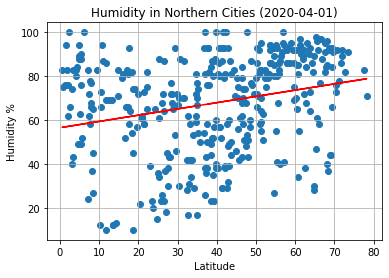

In [18]:
# Build a scatter plot for each data type
plt.scatter(northern_df.Lat, northern_df.Humidity, marker="o")

# Run the regression plotting function
lingressplot(northern_df.Lat,northern_df.Humidity)

# Incorporate the other graph properties
plt.title("Humidity in Northern Cities (" + time_label + ")")
plt.ylabel("Humidity %")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output/HumidityInNorthernCities.png")

# Show plot
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.05041347865794374
The formula for the regression line is: y = 0.26x +82.11.


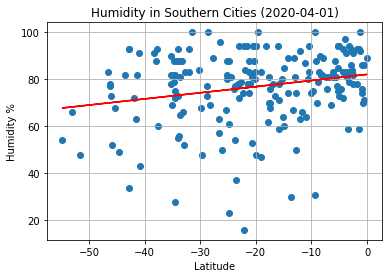

In [19]:
# Build a scatter plot for each data type
plt.scatter(southern_df.Lat, southern_df.Humidity, marker="o")

# Run the regression plotting function
lingressplot(southern_df.Lat,southern_df.Humidity)

# Incorporate the other graph properties
plt.title("Humidity in Southern Cities (" + time_label + ")")
plt.ylabel("Humidity %")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output/HumidityInSouthernCities.png")

# Show plot
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.029104856760587043
The formula for the regression line is: y = 0.35x +33.68.


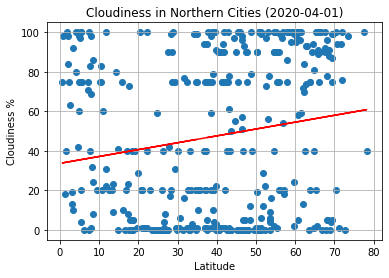

In [20]:
# Build a scatter plot for each data type
plt.scatter(northern_df.Lat, northern_df.Cloudiness, marker="o")

# Run the regression plotting function
lingressplot(northern_df.Lat,northern_df.Cloudiness)

# Incorporate the other graph properties
plt.title("Cloudiness in Northern Cities (" + time_label + ")")
plt.ylabel("Cloudiness %")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output/CloudinessInNorthernCities.png")

# Show plot
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.06948691262344667
The formula for the regression line is: y = 0.68x +74.68.


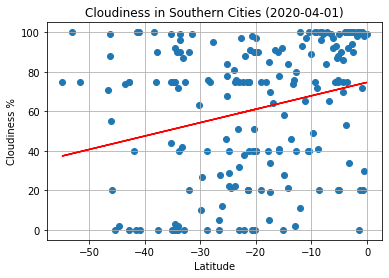

In [21]:
# Build a scatter plot for each data type
plt.scatter(southern_df.Lat, southern_df.Cloudiness, marker="o")

# Run the regression plotting function
lingressplot(southern_df.Lat,southern_df.Cloudiness)

# Incorporate the other graph properties
plt.title("Cloudiness in Southern Cities (" + time_label + ")")
plt.ylabel("Cloudiness %")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output/CloudinessInSouthernCities.png")

# Show plot
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.018363210576815326
The formula for the regression line is: y = 0.04x +7.11.


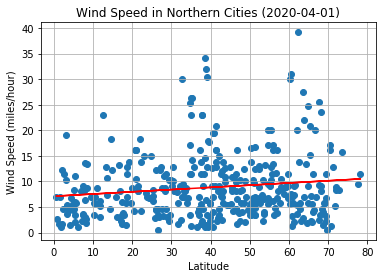

In [22]:
# Build a scatter plot for each data type
plt.scatter(northern_df.Lat, northern_df["Wind Speed"], marker="o")

# Run the regression plotting function
lingressplot(northern_df.Lat,northern_df["Wind Speed"])

# Incorporate the other graph properties
plt.title("Wind Speed in Northern Cities (" + time_label + ")")
plt.ylabel("Wind Speed (miles/hour)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output/WindSpeedInNorthernCities.png")

# Show plot
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.07248916721566229
The formula for the regression line is: y = -0.09x +4.84.


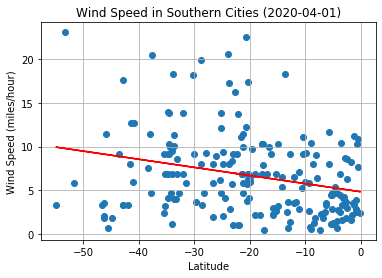

In [23]:
# Build a scatter plot for each data type
plt.scatter(southern_df.Lat, southern_df["Wind Speed"], marker="o")

# Run the regression plotting function
lingressplot(southern_df.Lat,southern_df["Wind Speed"])

# Incorporate the other graph properties
plt.title("Wind Speed in Southern Cities (" + time_label + ")")
plt.ylabel("Wind Speed (miles/hour)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output/WindSpeedInSouthernCities.png")

# Show plot
plt.show()